# Week 1 - Statistical Rethinking 2019

In [26]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import stan

1) Suponha que o globo foi lançado gerando os dados de $8$ water em 15 lançamentos.

Construir a distribuição posteriori, usando  *grid approximation*. Utilizar a mesma priori flat que usamos na aula.

In [120]:
# Initiais Parameters
total_tossing = 15
total_water = 10

total_hypothesis_to_testing = 100

In [121]:
# Generating data from tossing globe
data = ['w'] * total_water + ['L'] * (total_tossing - total_water)

print("Data: ", end="")
print(data)

Data: ['w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'L', 'L', 'L', 'L', 'L']


In [122]:
# Transform data vetor in binary data
data_bin = [1 if sample == 'w' else 0 for sample in data]

In [123]:
# Total hypothesis adjust do scipy scope functions
total_tossing = 1 / total_hypothesis_to_testing
probs = np.arange(0, 1, (1/100))

In [124]:
# Priori - flat
priori = stats.uniform.pdf(probs, 0, 1)

In [125]:
# Evaluate the likelihood
sum_qty_w = sum(data_bin)
total_tossing = len(data_bin)
probs = np.arange(0, 1, (1/100))

likelyhood = stats.binom.pmf(sum_qty_w, n=total_tossing, p=probs)

In [126]:
# Evaluate the posteriori

posteriori = likelyhood * priori
posteriori = posteriori / sum(posteriori)

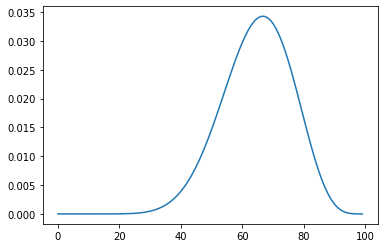

In [127]:
plt.plot(posteriori)

----

2) Usar a priori como: 

$$ priori_2 = \Bigg\{\array{1,  p > 0.5 \\
            0, c.c.   }$$ 

In [128]:
priori2 = stats.uniform.pdf(probs, 0.5, 1)

In [129]:
# Posteriori 2
posteriori2 = likelyhood * priori2
posteriori2 = posteriori2 / sum(posteriori2)

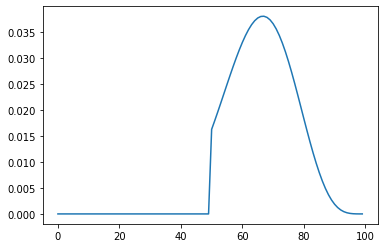

In [130]:
plt.plot(posteriori2)

----

3) Obter um intervalo menor que $0.05$ dos quantil 99% 

In [163]:
def generate_posteriori(qty_samples):

    # Make the fast way the generating data
    """
    total_tossing = 15
    total_water = 10
    
    total_hypothesis_to_testing = 100
    
    # Generating data from tossing globe
    data = ['w'] * total_water + ['L'] * (total_tossing - total_water)

    # Transform data vetor in binary data
    data_bin = [1 if sample == 'w' else 0 for sample in data]
    """
    data_bin = stats.bernoulli(0.7).rvs(qty_samples)

    # Total hypothesis adjust do scipy scope functions
    total_tossing = 1 / total_hypothesis_to_testing
    probs = np.arange(0, 1, (1/100))

    # Priori - flat
    priori = stats.uniform.pdf(probs, 0, 1)

    # Evaluate the likelihood
    sum_qty_w = sum(data_bin)
    total_tossing = len(data_bin)
    probs = np.arange(0, 1, (1/100))

    likelyhood = stats.binom.pmf(sum_qty_w, n=total_tossing, p=probs)

    # Evaluate the posteriori
    posteriori = likelyhood * priori
    posteriori = posteriori / sum(posteriori)

    precision = ((np.sum(np.cumsum(posteriori) == 0) + np.sum(np.cumsum(posteriori) == 1))/100)
    print("Precisâo:", precision)
    
    plt.plot(posteriori)

Precisâo: 0.99


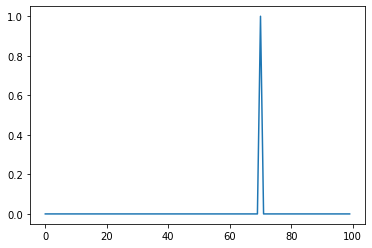

In [168]:
posteriori = generate_posteriori(1000000)